# University of Idaho - Climate Impacts Research Consortium (CIRC)
## Data Mining Stream: Agricultural Resilience Data Modeling
### Erich Seamon, June 10, 2016
### erichs@uidaho.edu
### http://dmine.io
### http://erich.io

<H2>DMINE Ag Resilience - Part 4: Data Modeling </H2>

**The Climate Impacts Research Consortium (CIRC)** data mining stream has developed a set of data mining and machine learning processes, in order to provide a basic example of how we might approach climatic impact prediction over space and time.

Our example in this instance is to explore how we might predict economic crop loss over space and time, using data that is extracted from differing sources, transformed, and combined with a response variable that is a approximation of economic crop loss, in dollars. This notebook provides an overview of our steps for this example, which include:


**1. Demo Overview. ** An overview of the problem, summary of the datasets involved.
   <br> </br> <br></br>
**2. Data transformation.**  What steps do we need to take to transform and combine data into a form that is ready to machine learning techniques?
    <br></br><br></br>
**3. Exploratory Data Analysis.**  After transforming the data, a matrix of all values is generated.  From this dataset, what EDA can we perform that will help us to better understand our hypothesis/es?
    <br></br><br></br>
**4. Machine learning model generation, optimization.**  Which model works best?
   <br></br><br></br>
**5. Model Instantiation. ** Apply most optimized model to a python API for enabling prediction requests.


## 1. Demo Overview: Overview of the problem, and summary of datasets

### Food Resilience NOAA key points (adapted from Third National Climate Assessment - Hatfield, et al, 2014)


 - Climate disruptions to agricultural production have increased over the past 40 years and are projected to increase over the next 25 years. Farmers and ranchers will likely need to increase their rate of innovation and adaptation to keep pace with this projected change.
 
 - Crop and livestock production in many agricultural regions will likely decline due to weeds, diseases, insects, and climate-related stresses.
 
 - The rising incidence of extreme weather—including heat waves, drought, and very heavy precipitation—will increasingly impact crop and livestock productivity.
 
 - Climate-related changes in crop yields and food prices as well as impacts on food processing, storage, and distribution systems can impact food security.
 
 
 ### Problem question: Can we perform data mining techniques to assemble food resilience data - and construct a machine learning model that predicts economic crop loss?
 
 

## Datasets and data sources used as part of the analysis

To be straightforward for the sake of demonstration - we are using two core datasets:
    
- **University of Idaho GRIDMET data.**  Since our CIRC project uses UIdaho GRIDMET/MACA data for a portion of our research efforts, i thought using this as an input dataset might be appropriate.  As a note, we can easily add variables to this grouping that might be from other sources.
- **USDA Economic Crop Loss data.**  The USDA's Risk Management Agency summarizes economic crop loss insurance claims at a county and monthly level, going back to 1980.  This dataset gives a historical view of crop loss, and to a more generalized degree, overall economic food security.  

Transforming both datasets to be spatially and geographically normalized (at the county/monthly/commodity level), we can then integrate into one big matrix.

## 2. Data Transformation

Data transformation was done in R.  The following R script was used to 

In [128]:
import PIL
from sklearn.ensemble import RandomForestRegressor
from scipy import stats
import os,sys
import numpy as np
from PIL import Image
from urllib2 import urlopen
import os,sys
from PIL import Image


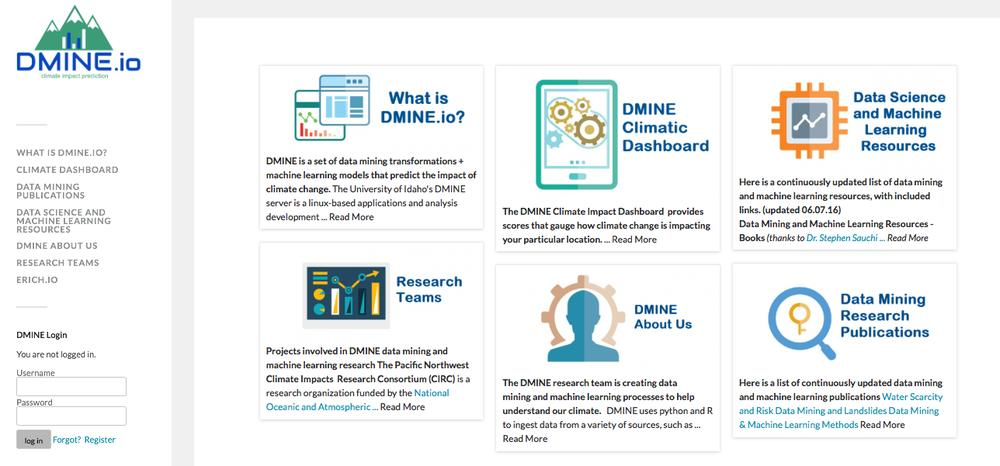

In [27]:
basewidth = 1000
img = Image.open(urlopen("http://dmine.io/wp-content/uploads/2016/06/Screen-Shot-2016-06-10-at-7.35.10-PM.png"))
wpercent = (basewidth / float(img.size[0]))
hsize = int((float(img.size[1]) * float(wpercent)))
img = img.resize((basewidth, hsize), PIL.Image.ANTIALIAS)
img.save("dmine-website-2016.jpg")
jpgfile = Image.open("dmine-website-2016.jpg")
jpgfile

# Machine Learning Demonstration - CIRC DMINE AG



## Loading libraries and importing data.  

This dataset is a ~14000 record dataset of monthly crop loss and acreage values, that has been integrated with GRIDMET daily data - summarized to monthly, and at a county geographic scale - for only Washington.

In [9]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
os.chdir("/home/git/data/USDA/pdf2016/")
train = pd.read_table('USDA-indemnity.txt', sep=' ')
%matplotlib nbagg

In [10]:
train

X1       X3  X4               X5  X6     X7        X8     X9
1493   2015  MONTANA  30       Beaverhead   1  30001     76942  10416
1494   2015  MONTANA  30         Big-Horn   3  30003   2119006  10416
1495   2015  MONTANA  30           Blaine   5  30005   6571951  10416
1496   2015  MONTANA  30       Broadwater   7  30007    446426  10416
1497   2015  MONTANA  30           Carbon   9  30009    157168  10416
1498   2015  MONTANA  30           Carter  11  30011    489349  10416
1499   2015  MONTANA  30          Cascade  13  30013   1726125  10416
1500   2015  MONTANA  30         Chouteau  15  30015   9220914  10416
1501   2015  MONTANA  30           Custer  17  30017   1183743  10416
1502   2015  MONTANA  30          Daniels  19  30019   4899260  10416
1503   2015  MONTANA  30           Dawson  21  30021    639932  10416
1504   2015  MONTANA  30       Deer-Lodge  23  30023         0  10416
1505   2015  MONTANA  30           Fallon  25  30025   1398871  10416
1506   2015  MONTANA  30           Fergus  27  30027    839773  10416
1507   2015  MONTANA  30         Flathead  29  30029    352346  10416
1508   2015  MONTANA  30         Gallatin  31  30031    372470  10416
1509   2015  MONTANA  30         Garfield  33  30033    408228  10416
1510   2015  MONTANA  30          Glacier  35  30035   3868294  10416
1511   2015  MONTANA  30    Golden-Valley  37  30037    360928  10416
1512   2015  MONTANA  30          Granite  39  30039         0  10416
1513   2015  MONTANA  30             Hill  41  30041  29264836  10416
1514   2015  MONTANA  30        Jefferson  43  30043    266560  10416
1515   2015  MONTANA  30     Judith-Basin  45  30045    293059  10416
1516   2015  MONTANA  30             Lake  47  30047    420415  10416
1517   2015  MONTANA  30  Lewis-and-Clark  49  30049    343601  10416
1518   2015  MONTANA  30          Liberty  51  30051  11716702  10416
1519   2015  MONTANA  30          Lincoln  53  30053     31620  10416
1520   2015  MONTANA  30          Madison  57  30057    130406  10416
1521   2015  MONTANA  30           McCone  55  30055   1955793  10416
1522   2015  MONTANA  30          Meagher  59  30059     92335  10416
...     ...      ...  ..              ...  ..    ...       ...    ...
32579  2015    IDAHO  16           Canyon  27  16027    783135  60616
32580  2015    IDAHO  16          Caribou  29  16029    589044  60616
32581  2015    IDAHO  16           Cassia  31  16031   1782644  60616
32582  2015    IDAHO  16            Clark  33  16033    140930  60616
32583  2015    IDAHO  16       Clearwater  35  16035    681616  60616
32584  2015    IDAHO  16           Custer  37  16037         0  60616
32585  2015    IDAHO  16           Elmore  39  16039    829609  60616
32586  2015    IDAHO  16         Franklin  41  16041    207162  60616
32587  2015    IDAHO  16          Fremont  43  16043    758919  60616
32588  2015    IDAHO  16              Gem  45  16045    128508  60616
32589  2015    IDAHO  16          Gooding  47  16047     79108  60616
32590  2015    IDAHO  16            Idaho  49  16049   8980514  60616
32591  2015    IDAHO  16        Jefferson  51  16051   2203690  60616
32592  2015    IDAHO  16           Jerome  53  16053    513933  60616
32593  2015    IDAHO  16         Kootenai  55  16055    722431  60616
32594  2015    IDAHO  16            Latah  57  16057   5985721  60616
32595  2015    IDAHO  16            Lemhi  59  16059         0  60616
32596  2015    IDAHO  16            Lewis  61  16061   6066237  60616
32597  2015    IDAHO  16          Lincoln  63  16063   1348695  60616
32598  2015    IDAHO  16          Madison  65  16065     72167  60616
32599  2015    IDAHO  16         Minidoka  67  16067    441290  60616
32600  2015    IDAHO  16        Nez-Perce  69  16069   4719467  60616
32601  2015    IDAHO  16           Oneida  71  16071    401191  60616
32602  2015    IDAHO  16           Owyhee  73  16073   1737281  60616
32603  2015    IDAHO  16          Payette  75  16075    918126  60616
32604  2015    IDAH

In [19]:
# create feature matrix (X)
all_cols = ['year', 'state', 'statecode', 'county', 'countycode', 'fips', 'loss', 'date']
feature_cols = ['year', 'state', 'statecode', 'county', 'countycode', 'fips', 'acres']

train.columns = all_cols



## Actual crop loss observations, WA MT OR ID, 2016 up to Jun 20th

In [20]:
train.head()

year    state  statecode      county  countycode   fips     loss   date
1493  2015  MONTANA         30  Beaverhead           1  30001    76942  10416
1494  2015  MONTANA         30    Big-Horn           3  30003  2119006  10416
1495  2015  MONTANA         30      Blaine           5  30005  6571951  10416
1496  2015  MONTANA         30  Broadwater           7  30007   446426  10416
1497  2015  MONTANA         30      Carbon           9  30009   157168  10416

## All crop loss by state for WA MT OR ID

<IPython.core.display.Javascript object>


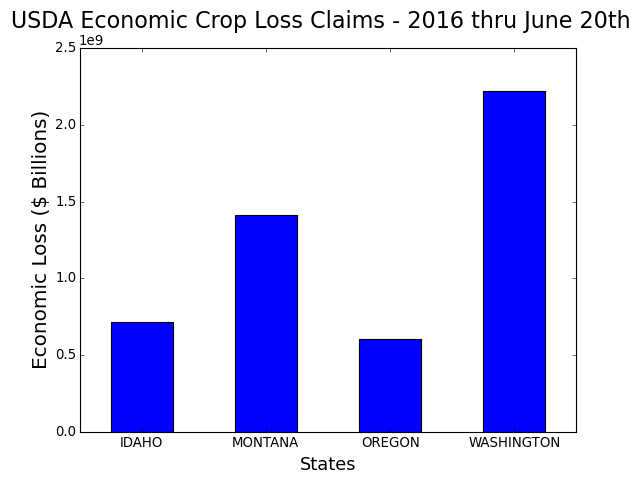

In [33]:
%matplotlib nbagg
fig = plt.figure()
train.groupby(['state']).loss.sum().plot(kind='bar', rot=0)
fig.suptitle('USDA Economic Crop Loss Claims - 2016 thru June 20th', fontsize=20)
plt.ylabel('Economic Loss ($ Billions)', fontsize=18)
plt.xlabel('States', fontsize=16)






## All Loss by date for WA MT OR ID, 2016 - grouped by time and state.  You can see the relative increase over time, and how WA has a slightly greater increase, with Montana leveling off.

<IPython.core.display.Javascript object>


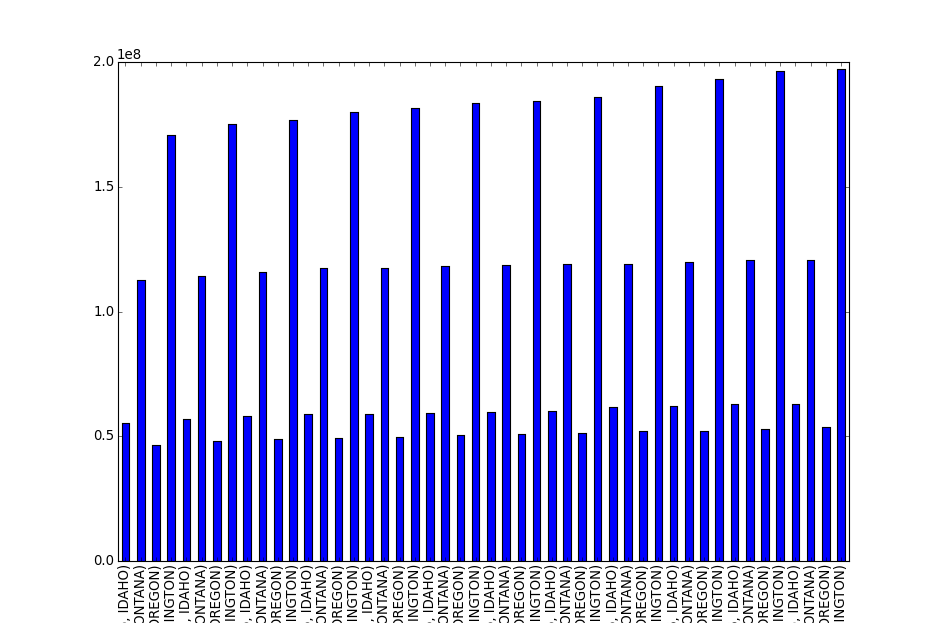

In [24]:
%matplotlib nbagg
train.groupby(['date', 'state']).loss.sum().plot(kind='bar')

## All Loss by County for Washington, 2001-2015

<IPython.core.display.Javascript object>


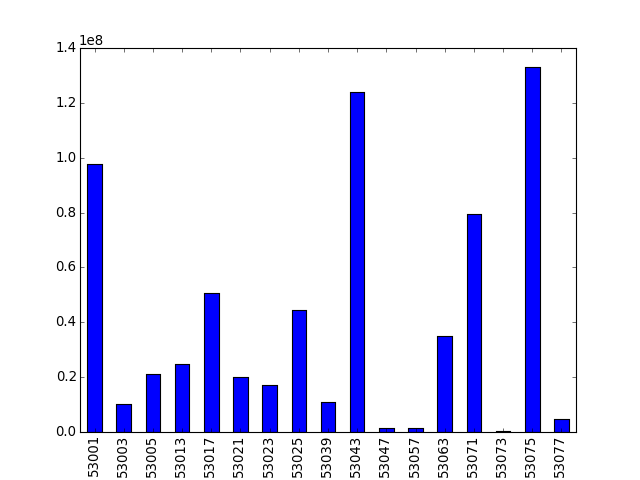

In [83]:
%matplotlib nbagg
actual.groupby(['countyfips']).loss.sum().plot(kind='bar')

## Histogram of loss by County, Washington, 2001 - 2015.  Are there many small claims, a few large claims by county?

<IPython.core.display.Javascript object>


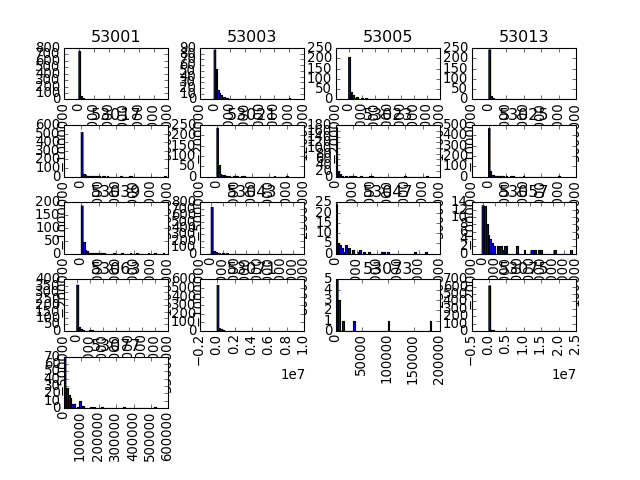

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f45ff91ad50>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f45fef59ad0>]], dtype=object)

In [84]:
%matplotlib nbagg
actual.hist(column='loss', by='countyfips', grid=False, bins=50)


## Box Plot of Wheat crop loss by month, Washington, 2001 - 2015 - by year - using log tranformed data

<IPython.core.display.Javascript object>


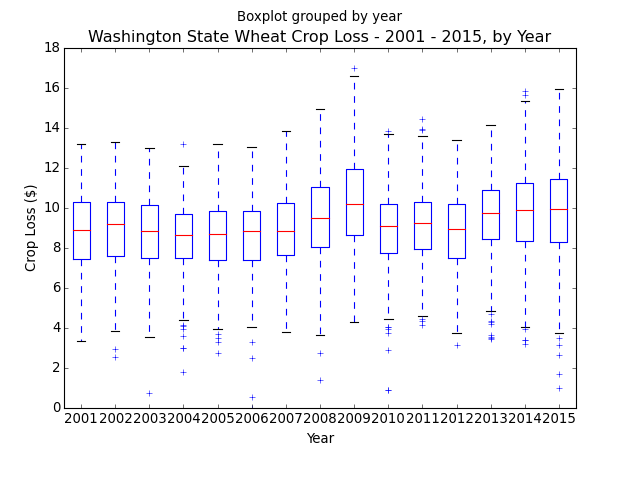

In [85]:
%matplotlib nbagg

from pylab import *
from scipy.io import loadmat

actual_log.boxplot(column='logloss', by='year', grid=False)
# labels = ('Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
#           'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec')
# xticks(range(1,13),labels, rotation=15)
xlabel('Year')
ylabel('Crop Loss ($)')
title('Washington State Wheat Crop Loss - 2001 - 2015, by Year')

## Box Plot of Wheat crop loss by damage cause, Washington, 2001 - 2015 - by year - using log tranformed data

<IPython.core.display.Javascript object>


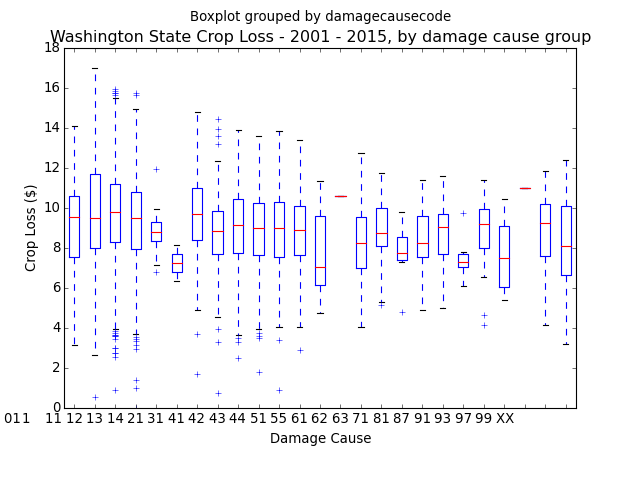

In [86]:
%matplotlib nbagg

from pylab import *
from scipy.io import loadmat

actual_log.boxplot(column='logloss', by='damagecausecode', grid=False)
# labels = ('Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
#           'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec')
# xticks(range(1,13),labels, rotation=15)
xlabel('Damage Cause')
ylabel('Crop Loss ($)')
title('Washington State Crop Loss - 2001 - 2015, by damage cause group')

<IPython.core.display.Javascript object>


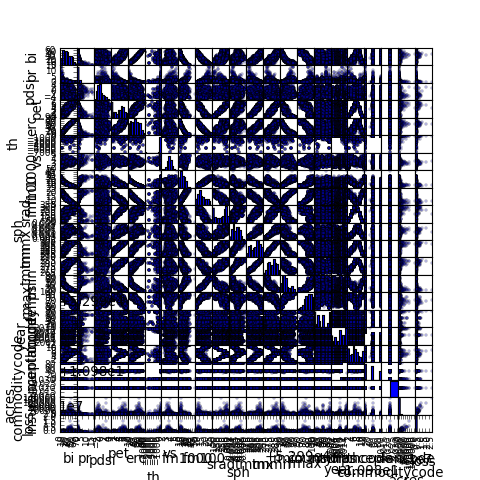

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f45ee0d0fd0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f45e000e550>]], dtype=object)

In [88]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(actual, alpha=0.2, figsize=(6, 6), diagonal='hist')

<IPython.core.display.Javascript object>


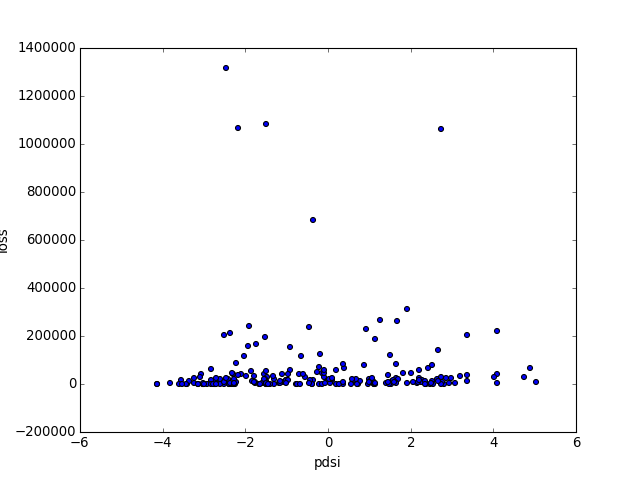

<IPython.core.display.Javascript object>


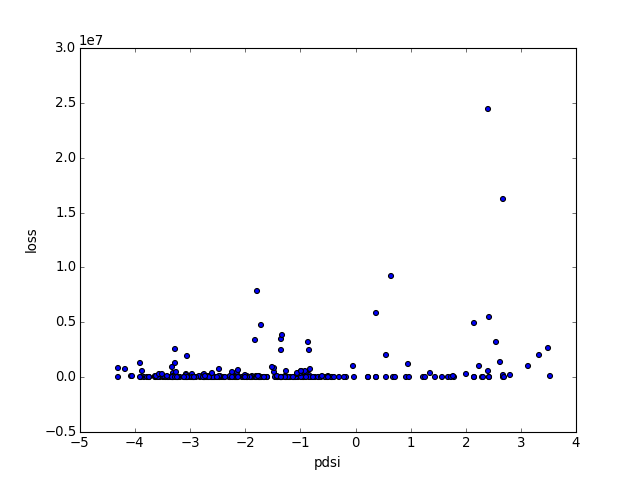

<IPython.core.display.Javascript object>


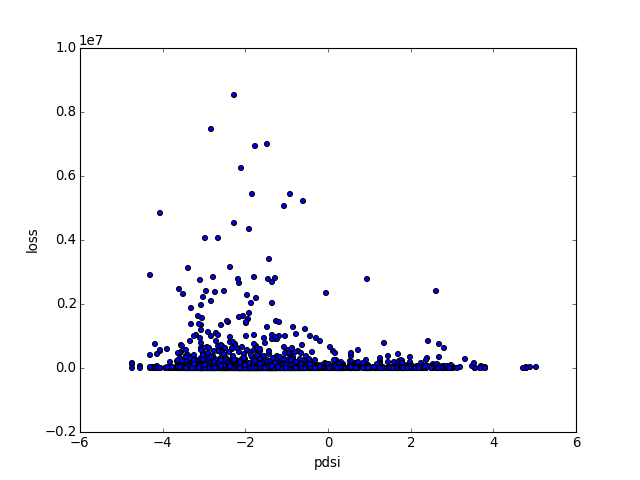

<IPython.core.display.Javascript object>


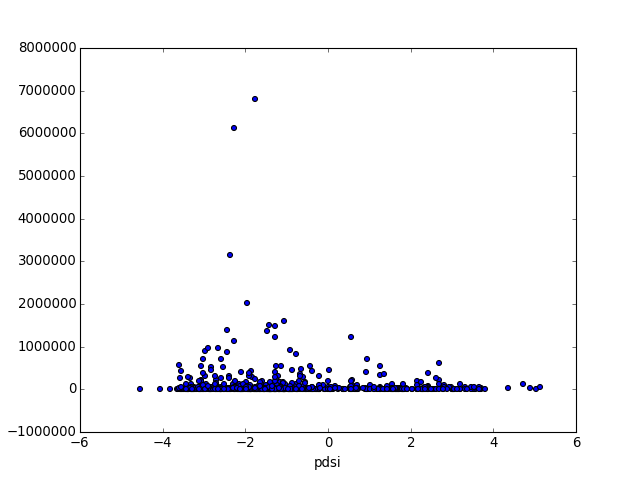

<IPython.core.display.Javascript object>


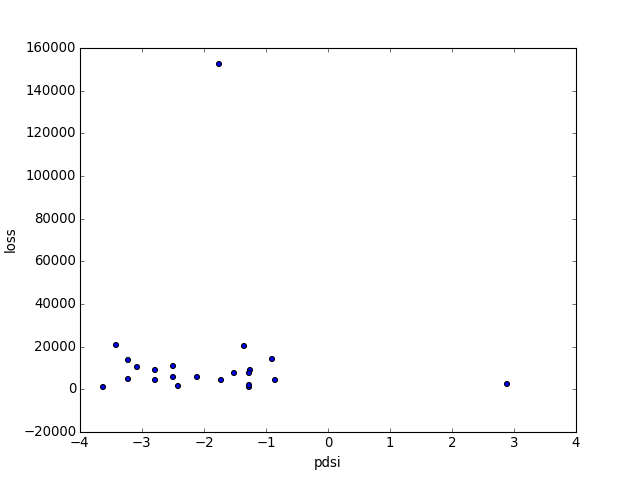

<IPython.core.display.Javascript object>


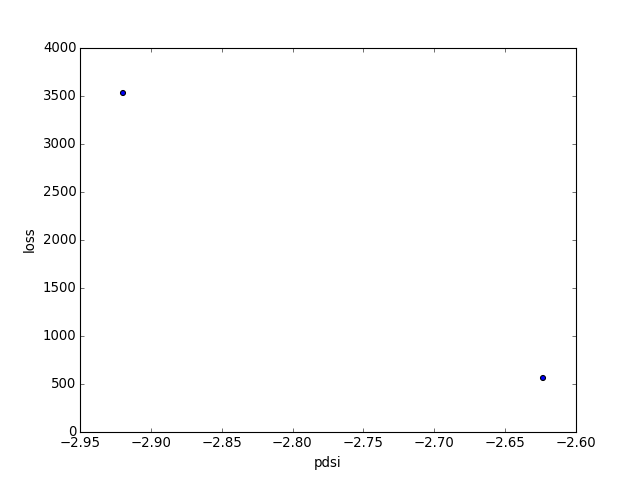

<IPython.core.display.Javascript object>


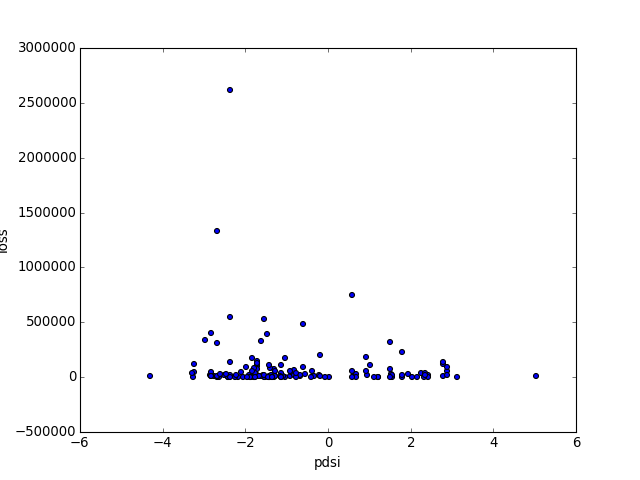

<IPython.core.display.Javascript object>


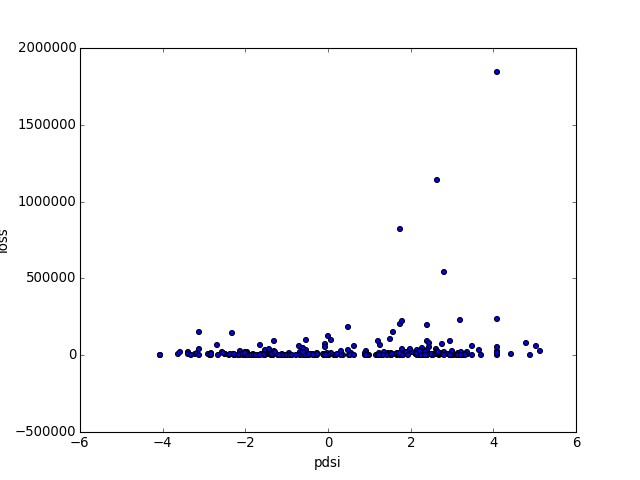

<IPython.core.display.Javascript object>


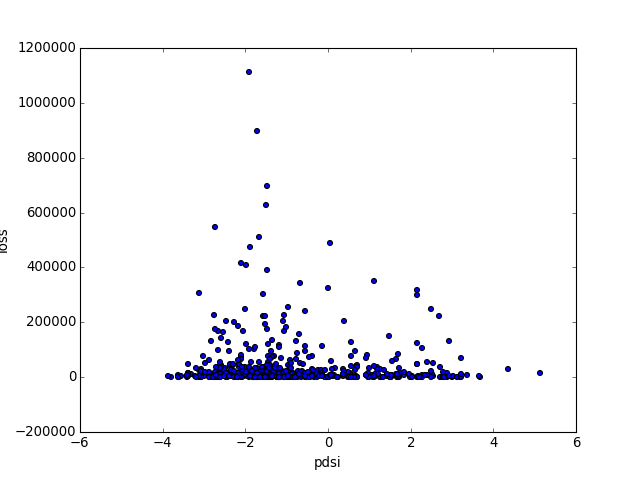

<IPython.core.display.Javascript object>


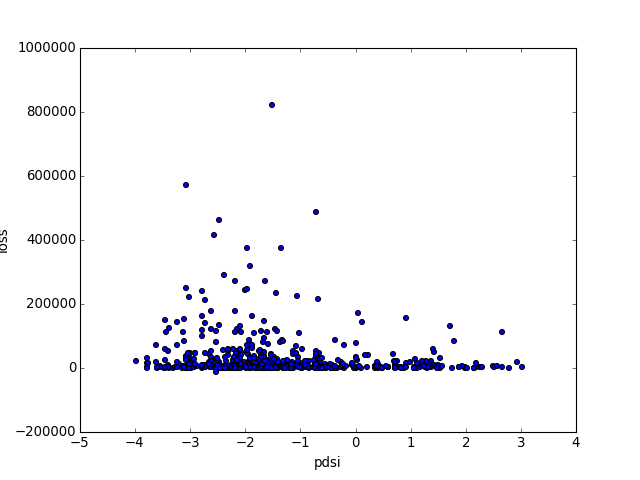

<IPython.core.display.Javascript object>


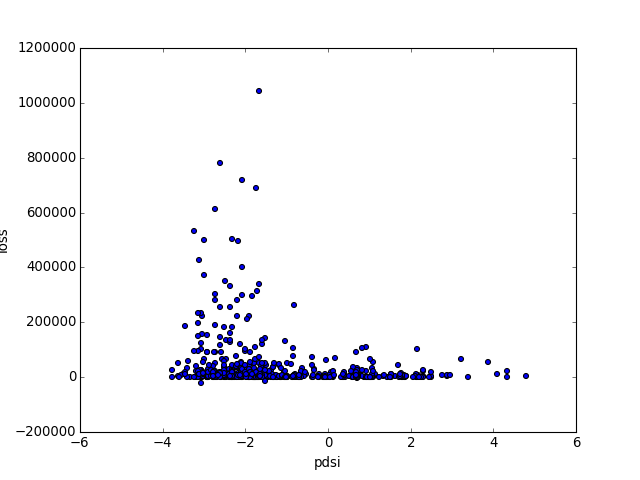

<IPython.core.display.Javascript object>


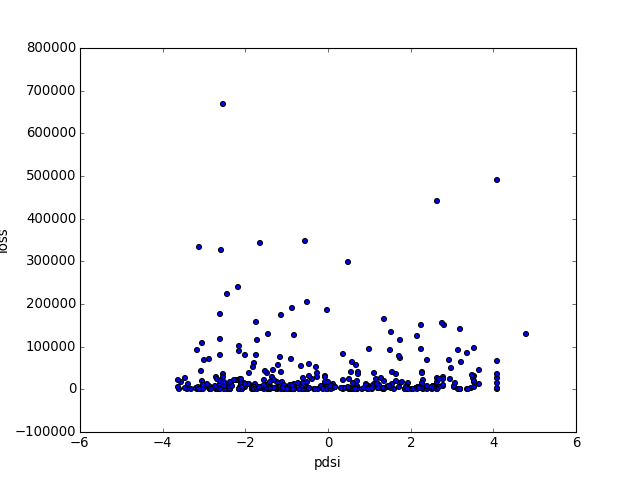

<IPython.core.display.Javascript object>


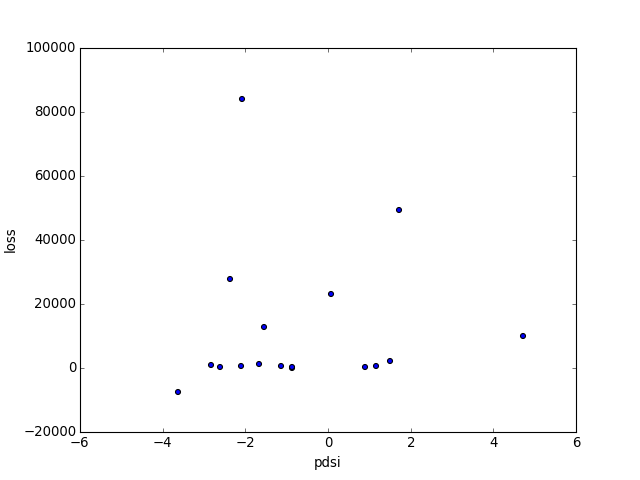

<IPython.core.display.Javascript object>


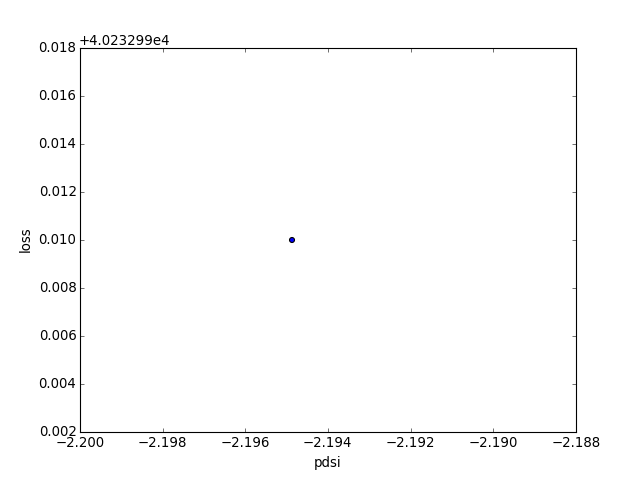

<IPython.core.display.Javascript object>


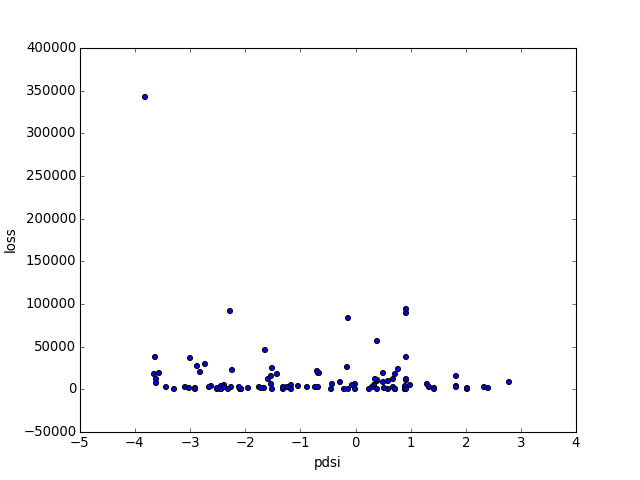

<IPython.core.display.Javascript object>


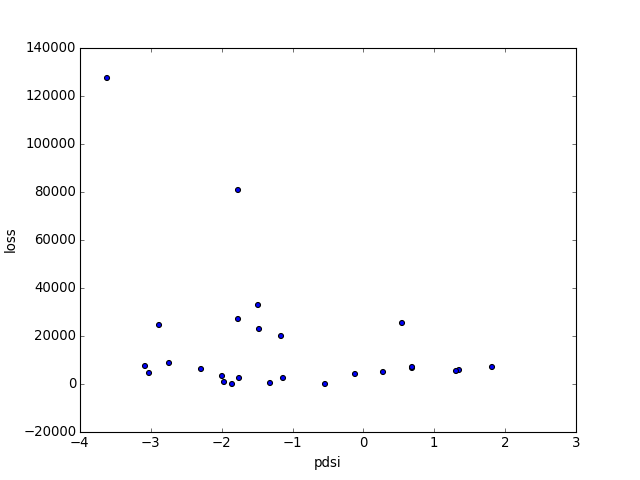

<IPython.core.display.Javascript object>


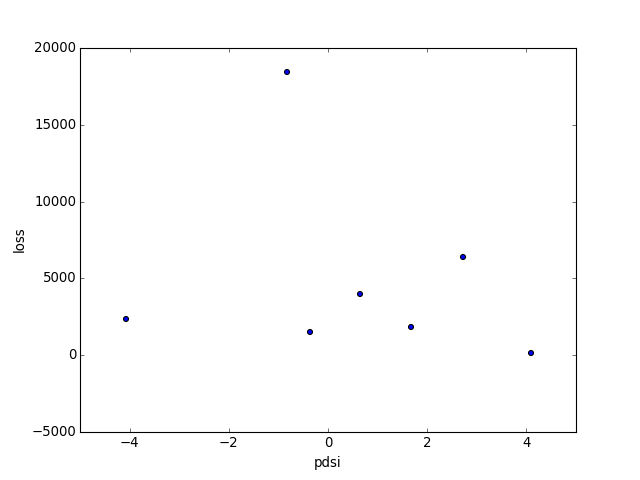

<IPython.core.display.Javascript object>


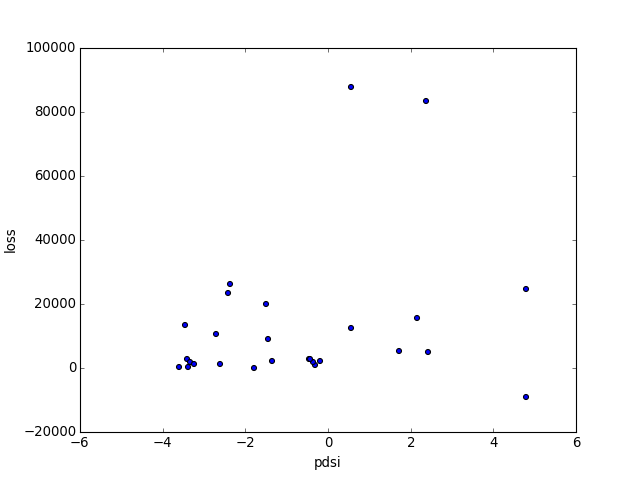

<IPython.core.display.Javascript object>


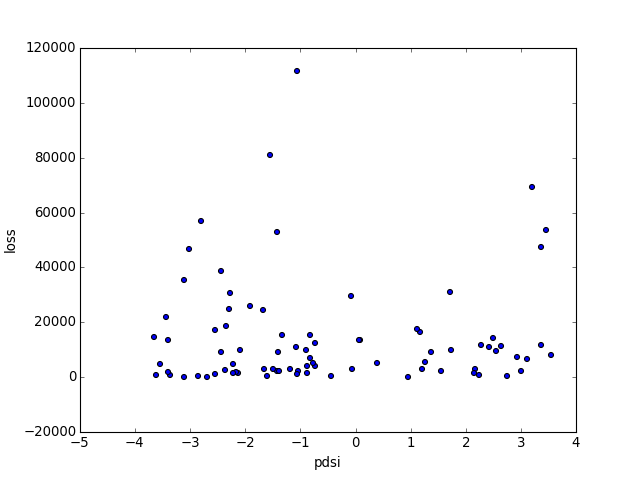

<IPython.core.display.Javascript object>


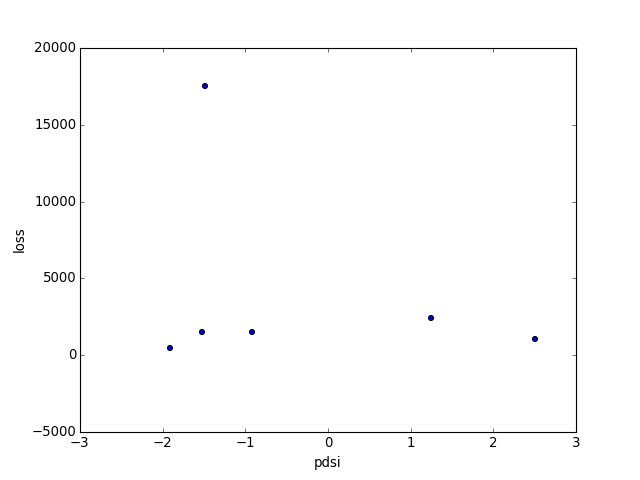

<IPython.core.display.Javascript object>


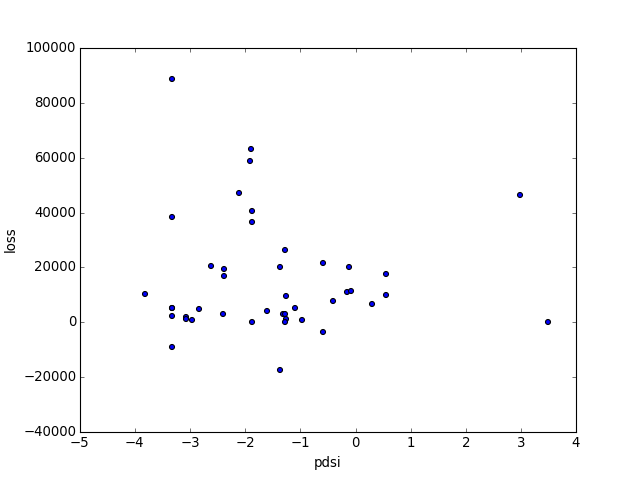

<IPython.core.display.Javascript object>


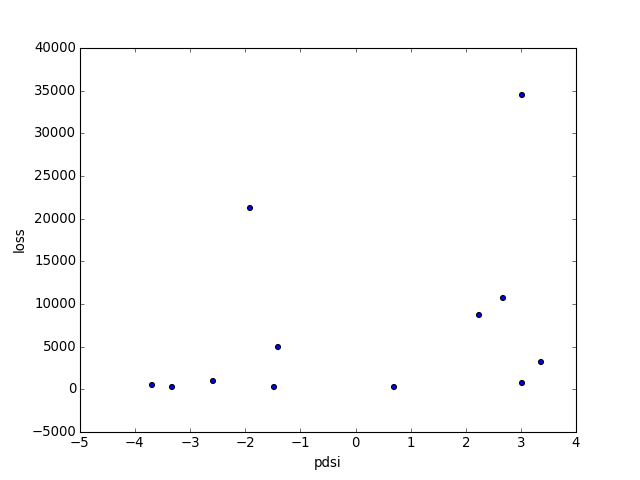

<IPython.core.display.Javascript object>


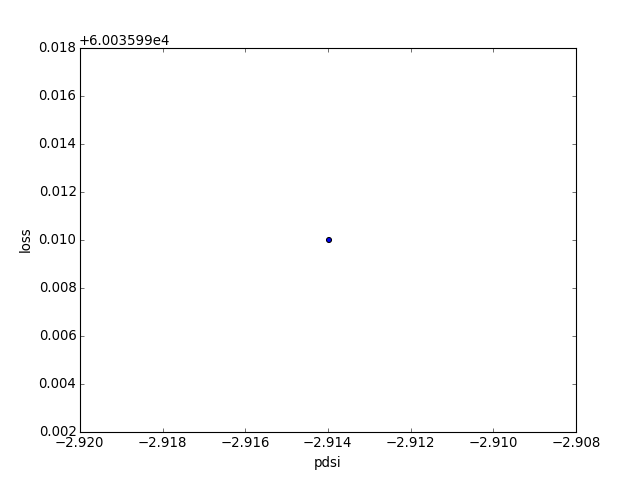

<IPython.core.display.Javascript object>


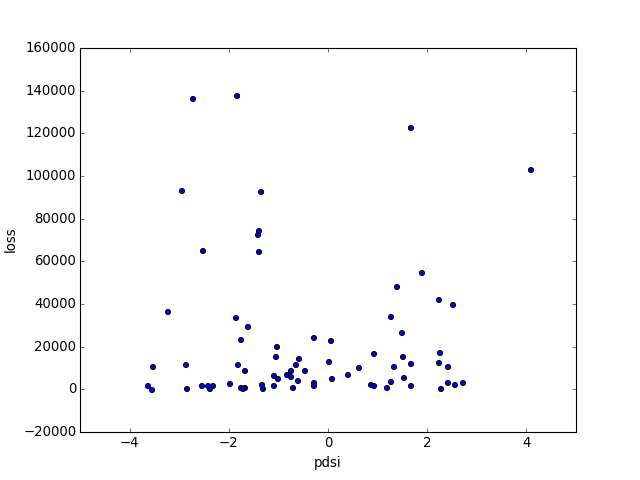

<IPython.core.display.Javascript object>


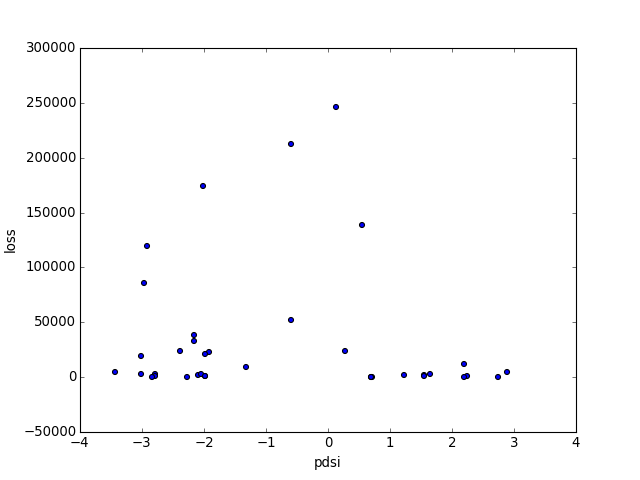

damagecausecode
01                                     Axes(0.125,0.1;0.775x0.8)
1                                      Axes(0.125,0.1;0.775x0.8)
11                                     Axes(0.125,0.1;0.775x0.8)
12                                     Axes(0.125,0.1;0.775x0.8)
13                                     Axes(0.125,0.1;0.775x0.8)
14                                     Axes(0.125,0.1;0.775x0.8)
21                                     Axes(0.125,0.1;0.775x0.8)
31                                     Axes(0.125,0.1;0.775x0.8)
41                                     Axes(0.125,0.1;0.775x0.8)
42                                     Axes(0.125,0.1;0.775x0.8)
43                                     Axes(0.125,0.1;0.775x0.8)
44                                     Axes(0.125,0.1;0.775x0.8)
51                                     Axes(0.125,0.1;0.775x0.8)
55                                     Axes(0.125,0.1;0.775x0.8)
61                                     Axes(0.125,0.1;0.775x0.8)
62       

In [90]:
# compare with scatter plot
actual.groupby(['damagecausecode']).plot(kind='scatter', x='pdsi', y='loss')

<IPython.core.display.Javascript object>


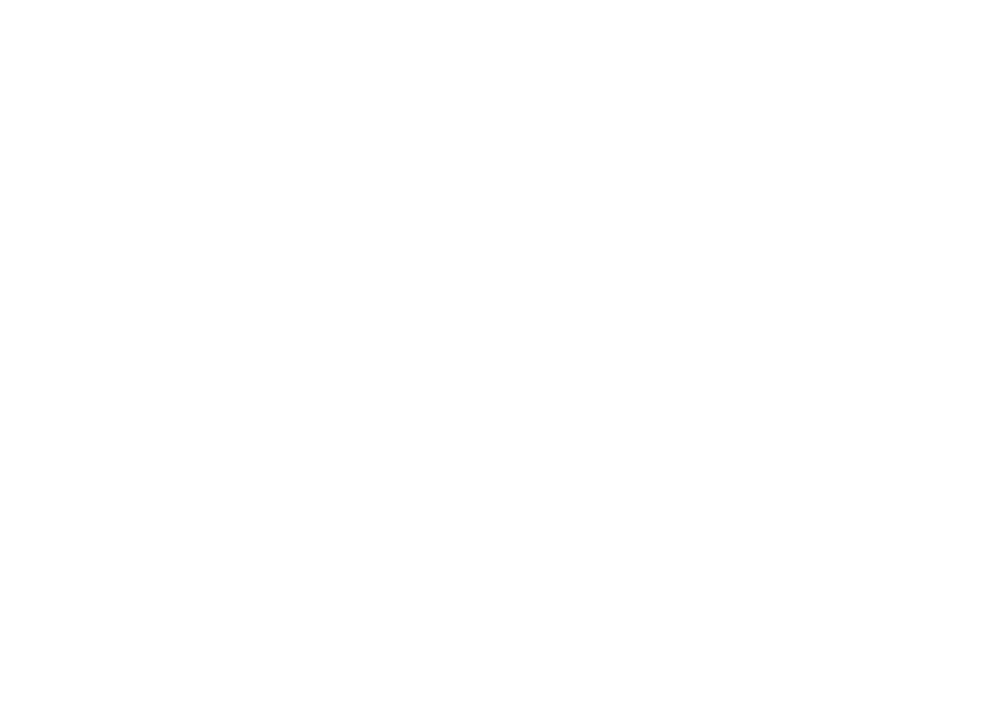

In [257]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

df = standardized
axes = pd.tools.plotting.scatter_matrix(df, alpha=0.2)
plt.tight_layout()
plt.savefig('scatter_matrix.png')

## Building a regression decision tree in scikit-learn

In [174]:
# instantiate a DecisionTreeRegressor (with random_state=1)
from sklearn.tree import DecisionTreeRegressor
treereg = DecisionTreeRegressor(random_state=1)
treereg

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, random_state=1, splitter='best')

In [175]:
# use 10 fold CV to estimate the RMSE for this model
from sklearn.cross_validation import cross_val_score
scores = cross_val_score(treereg, X, y, cv=10, scoring='mean_squared_error')
np.mean(np.sqrt(-scores))

566848.48301072244

## Tuning regression tree

Let's try to reduce the RMSE by tuning the **max_depth** parameter:

In [176]:
# try different values one-by-one
treereg = DecisionTreeRegressor(max_depth=1, random_state=1)
scores = cross_val_score(treereg, X, y, cv=10, scoring='mean_squared_error')
np.mean(np.sqrt(-scores))

433917.3643976982

## Looping thru a set number of max_depths to see the optimum level

In [187]:
# list of values to try
max_depth_range = range(1, 50)

# list to store the average RMSE for each value of max_depth
RMSE_scores = []

# use LOOCV with each value of max_depth
for depth in max_depth_range:
    treereg = DecisionTreeRegressor(max_depth=depth, random_state=1)
    MSE_scores = cross_val_score(treereg, X, y, cv=10, scoring='mean_squared_error')
    RMSE_scores.append(np.mean(np.sqrt(-MSE_scores)))

<IPython.core.display.Javascript object>


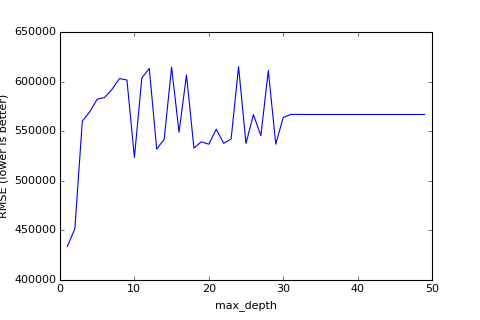

In [188]:
%matplotlib nbagg
# plot max_depth (x-axis) versus RMSE (y-axis)
plt.plot(max_depth_range, RMSE_scores)
plt.xlabel('max_depth')
plt.ylabel('RMSE (lower is better)')

In [190]:
# max_depth=3 was best, so fit a tree using that parameter
treereg = DecisionTreeRegressor(max_depth=10, random_state=1)
treereg.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=10, max_features=None,
           max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, random_state=1, splitter='best')

## Decision Tree Feature Importance determination

In [191]:
# "Gini importance" of each feature: the (normalized) total reduction of error brought by that feature
pd.DataFrame({'feature':feature_cols, 'importance':treereg.feature_importances_})

feature  importance
0       bi    0.017651
1       pr    0.015377
2     pdsi    0.433076
3      pet    0.045834
4      erc    0.002696
5       th    0.029793
6       vs    0.013354
7   fm1000    0.003020
8    fm100    0.103980
9     srad    0.064582
10     sph    0.204101
11    tmmx    0.003390
12    tmmn    0.005690
13    rmin    0.003775
14    rmax    0.053681

In examining the above feature importance table, these variables appear to be the most significant with regards to crop loss:

- th - wind speed
- vs - wind direction
- fm100 - 100-hour dead fuel moisture

    
    

In [344]:
sig_feature_cols = ['th', 'vs', 'fm100']
X_sig = train[feature_cols]


## Creating a tree diagram

In [192]:
# create a Graphviz file
from sklearn.tree import export_graphviz
export_graphviz(treereg, out_file='/home/git/dmine/circ/tree_ag.dot', feature_names=feature_cols)
#export_graphviz(treereg, out_file='tree_ag.dot')

#print fileconvert
# At the command line, run this to convert to PNG:
#dot -Tpng tree_ag.dot -o tree_ag.png

In [193]:
%system("dot -Tpng /home/git/dmine/circ/tree_ag.dot -o /home/git/dmine/circ/tree_ag.png")

['/bin/sh: dot -Tpng /home/git/dmine/circ/tree_ag.dot -o /home/git/dmine/circ/tree_ag.png: No such file or directory']

In [131]:

graph.draw('tree_ag.png')

NameError: name 'graph' is not defined

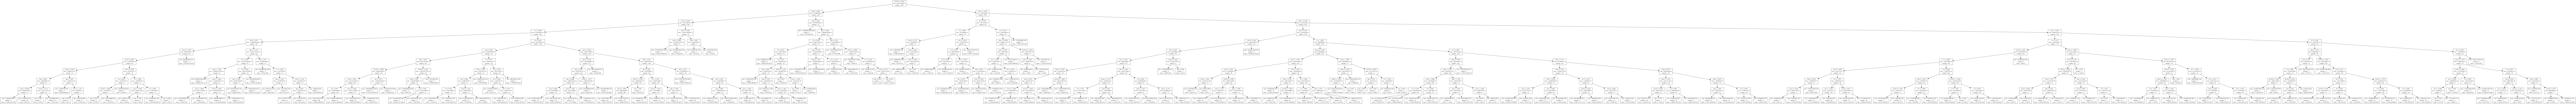

In [194]:
from IPython.display import Image
Image(filename='/home/git/dmine/circ/tree_ag.png')

In [380]:
print graph

## Making predictions for the testing data

**Question:** Using the tree diagram above, what predictions will the model make for each observation?

In [142]:
y_pred = treereg.predict(X_test)
y_pred

array([   95393.61464052,    95393.61464052,    95393.61464052,
         207267.51622222,    95393.61464052,    95393.61464052,
          95393.61464052,   145557.98308081,    95393.61464052,
          95393.61464052,    95393.61464052,    95393.61464052,
          95393.61464052,   145557.98308081,    95393.61464052,
          95393.61464052,   145557.98308081,   145557.98308081,
          95393.61464052,    95393.61464052,    95393.61464052,
          95393.61464052,    95393.61464052,    95393.61464052,
          95393.61464052,    95393.61464052,    95393.61464052,
         145557.98308081,   145557.98308081,    95393.61464052,
         145557.98308081,    95393.61464052,    95393.61464052,
          95393.61464052,   145557.98308081,    95393.61464052,
         145557.98308081,    95393.61464052,    95393.61464052,
          95393.61464052,    95393.61464052,   145557.98308081,
          95393.61464052,   145557.98308081,   207267.51622222,
          95393.61464052,    95393.61464

In [36]:
from sklearn import metrics
# calculate RMSE
np.sqrt(metrics.mean_squared_error(y_test, y_pred))

348648.06477484666

In [37]:
# calculate RMSE for your own tree!
#y_test = []
#y_pred = []
from sklearn import metrics
np.sqrt(metrics.mean_squared_error(y_test, y_pred))

348648.06477484666

## Random Forest

In [143]:
rf_range = range(1, 20)
rf_scores = []
for k in rf_range:
    rfreg = RandomForestRegressor(n_estimators=k, random_state=42)
    rfa_fit = rfreg.fit(X,y)
    rfa_scores = rfa_fit.score(X_test, y_test)
    rf_scores.append(rfa_scores.mean())

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:5: DataConversionWarning: A column-vector y was passed when a 1

<IPython.core.display.Javascript object>


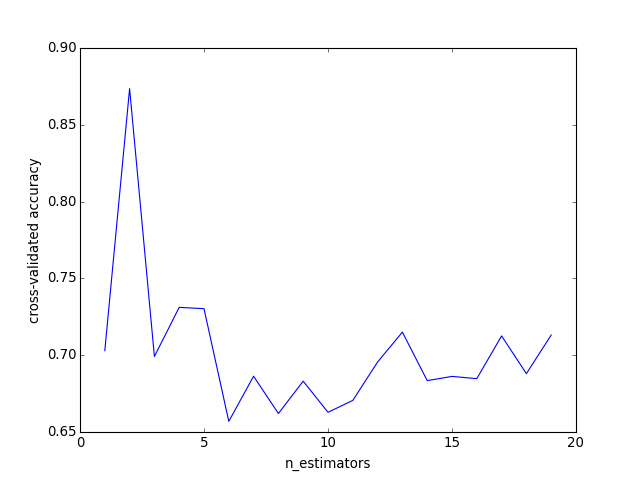

In [144]:
import matplotlib
%matplotlib nbagg
# plot n_estimators (x-axis) versus RMSE (y-axis)
plt.plot(rf_range, rf_scores)
plt.xlabel('n_estimators')
plt.ylabel('cross-validated accuracy')

## Optimized Random Forest

In [145]:
from sklearn.ensemble import RandomForestRegressor
rfor = RandomForestRegressor(random_state = 22, max_depth = 10)
rforfit = rfor.fit(X,y)
result14 = rforfit.score(X_test,y_test)
print "The AUC for the variables selected with logistic regression is:"
print round(result14, 4)
print "The time it takes to run is:"


The AUC for the variables selected with logistic regression is:
0.5295
The time it takes to run is:


/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


### Ridge Regression

In [146]:
from sklearn.linear_model import RidgeCV
np.mean(cross_val_score(RidgeCV(), X, y, scoring='mean_squared_error'))

-236961445483.29971

## Find Optimal K in KNN

In [149]:
from sklearn.cross_validation import cross_val_score
from sklearn.neighbors import KNeighborsRegressor
x = range(1, 25)
knnoptim = []
for k in x:
    knno = KNeighborsRegressor(n_neighbors = k)
    kfit = knno.fit(X,y)
    scores = kfit.score(X_test, y_test)
    knnoptim.append(scores)

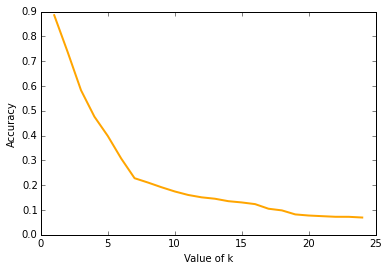

In [150]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(x, knnoptim, color = 'orange', linewidth = 2)
plt.xlabel('Value of k')
plt.ylabel('Accuracy')

### K Nearest Neighbors rerun with N = 10, as determined from above accuracy testing

In [153]:
knn = KNeighborsRegressor(n_neighbors=1)
knnfit = knn.fit(X,y)
result =  knnfit.score(X_test, y_test)
print "The accuracy score selected with logistic regression is:"
print round(result, 4)
print "The time it took to run is:"

The accuracy score selected with logistic regression is:
0.8855
The time it took to run is:


### Find optimal max depth for Regression Decision tree

Here we iterate thru a set of ranges for maximum depth of a decision tree, to see what is the optimum depth

In [154]:
from sklearn.tree import DecisionTreeRegressor
deep = range(1, 31)
treeoptim = []
for i in deep:
    treee = DecisionTreeRegressor(random_state = 22, max_depth = i)
    treefit = treee.fit(X,y)
    treescore = treefit.score(X_test, y_test)
    treeoptim.append(treescore)

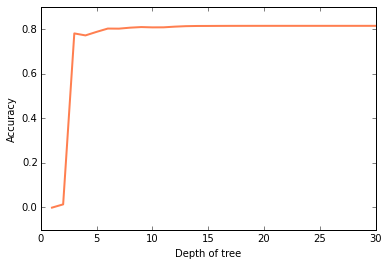

In [155]:
plt.plot(deep, treeoptim, color = 'coral', linewidth = 2)
plt.xlabel('Depth of tree')
plt.ylabel('Accuracy')

### Optimized Regression Decision Tree

Here we run a regression decision tree with a max depth of 20, as indicated from above accuracy testing

In [156]:
treee = DecisionTreeRegressor(random_state = 22, max_depth = 20)
treefit = treee.fit(X,y)
treescore = treefit.score(X_test, y_test)
print "The accuracy score for variables selected using a Regression Decision Tree is:"
treescore

The accuracy score for variables selected using a Regression Decision Tree is:


0.81380514950111649

## Ensemble methods - Bagging

In [164]:
from sklearn.ensemble import BaggingRegressor
bag = BaggingRegressor(max_samples = 1000, random_state = 22)
bagfit = bag.fit(X,y)
result12 = bagfit.score(X_test, y_test)
print "The AUC for the variables selected with logistic regression is:"
print round(result12, 4)
print "The time it takes to run is:"

The AUC for the variables selected with logistic regression is:
0.5302
The time it takes to run is:


/usr/local/lib/python2.7/site-packages/sklearn/utils/validation.py:449: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Extremely Randomized Trees

In [167]:
from sklearn.ensemble import ExtraTreesRegressor
etree = ExtraTreesRegressor(random_state = 40, min_samples_split=1, bootstrap = True, max_depth = 30)
etreefit = etree.fit(X,y)
result16 = etreefit.score(X_test, y_test)
print "The AUC for the variables selected with logistic regression is:"
print round(result16, 4)
print "The time it takes to run is:"

The AUC for the variables selected with logistic regression is:
0.5041
The time it takes to run is:


/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()
